In [1]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

home_path = '/home/jovyan/project/GEO/'
feature_path = '/home/jovyan/project/GEO/Images/'
target_path = '/home/jovyan/project/GEO/Target/'

In [2]:
## Load images
images = os.listdir(feature_path)

if ('.ipynb_checkpoints' in images):
    images.remove('.ipynb_checkpoints')
    
print('Number of available images: {}'.format(len(images)))

Number of available images: 21


In [3]:
## Selected images from the provided collection
images

['M20181020_172415--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180330_172405--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180809_172412--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180411_172406--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180117_172405--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180306_172405--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180505_172407--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180210_172405--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180318_172405--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180914_172414--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20181207_172414--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20181113_172414--_SIG0-----_S1BIWGRDH1VVA_088_A0104_EU010M_E045N021T1.tif',
 'M20180926_172414--_SIG0-----_S1BIWGRDH1VVA_088_A01

In [4]:
## Load sample training image
sampleImage = rasterio.open(os.path.join(feature_path, images[0])).read().squeeze().astype('double')
print('Dimension of a sample image: {}'.format(sampleImage.shape))

Dimension of a sample image: (10000, 10000)


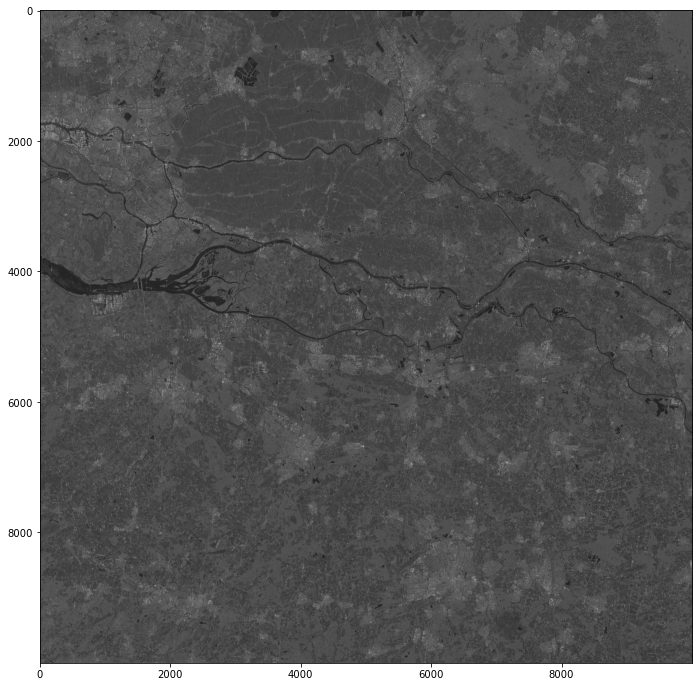

In [5]:
## Inspect sample training image
plt.figure(figsize = (12,12))
plt.imshow(sampleImage, cmap='gray')
plt.show()

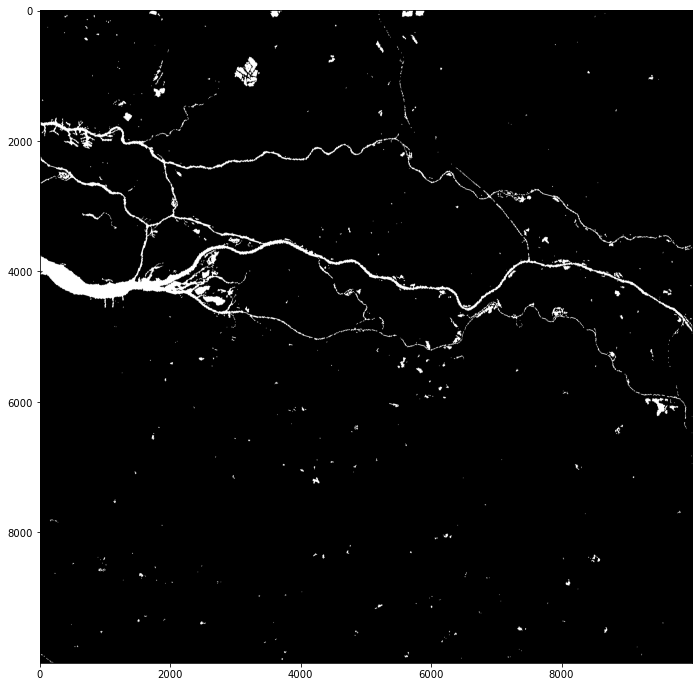

In [6]:
# Load and convert target to 0/1 water classification task
target = rasterio.open(os.path.join(target_path, "LC100_2015_global_v2.0.2_discrete-classification_EU010M_E045N021T1.tif"))
target = target.read().squeeze().astype('double')

target[~np.isin(target, [80,200])] = 0
target[np.isin(target, [80,200])] = 1
plt.figure(figsize = (12,12))
plt.imshow(target, cmap='gray')
plt.show()

In [7]:
## Calculate number of available patches with given overlap (using no padding outside image)
input_size = 10000
patch_size = 256
overlap = 24

patchesPerAxes = int((input_size-patch_size)/(patch_size-overlap))+int(1)
n_patches = patchesPerAxes*patchesPerAxes

print('Number of patches of size {}*{} with overlap {} per image: {}'.format(patch_size, patch_size, overlap, n_patches))

Number of patches of size 256*256 with overlap 24 per image: 1849


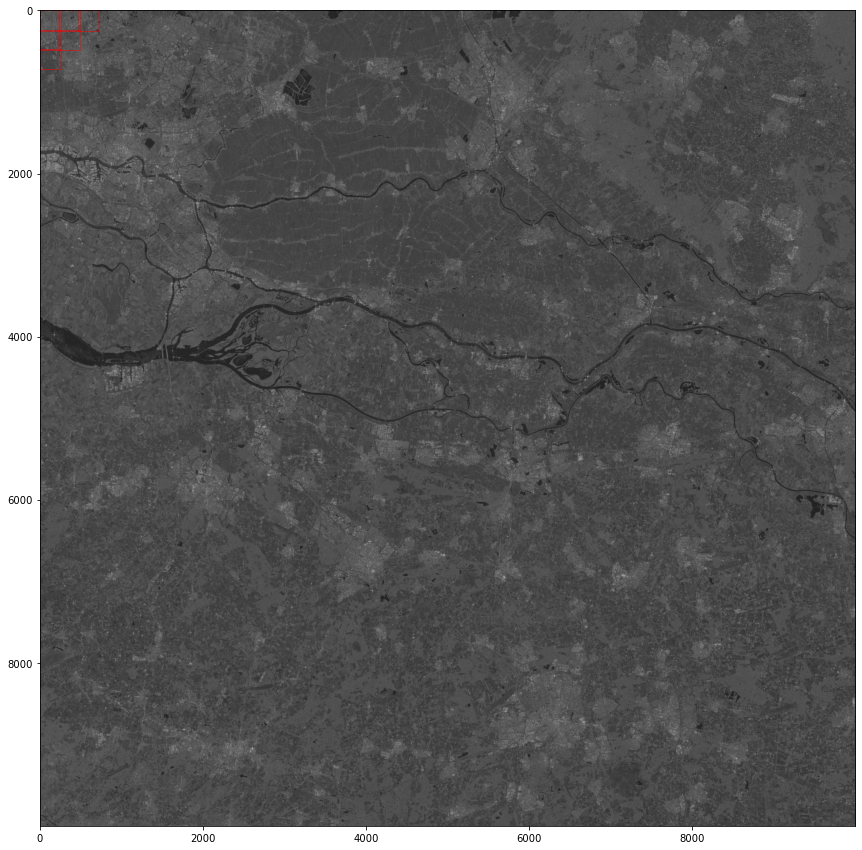

In [8]:
## Inspect sample training image
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize = (15,15))
ax.imshow(sampleImage, cmap='gray')
rect1 = patches.Rectangle((234*0, 234*0), 256, 256, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = patches.Rectangle((234*1, 234*0), 256, 256, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect2)
rect3 = patches.Rectangle((234*2, 234*0), 256, 256, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect3)
rect4 = patches.Rectangle((234*0, 234*1), 256, 256, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect4)
rect4 = patches.Rectangle((234*1, 234*1), 256, 256, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect4)
rect5 = patches.Rectangle((234*0, 234*2), 256, 256, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect5)
plt.show()

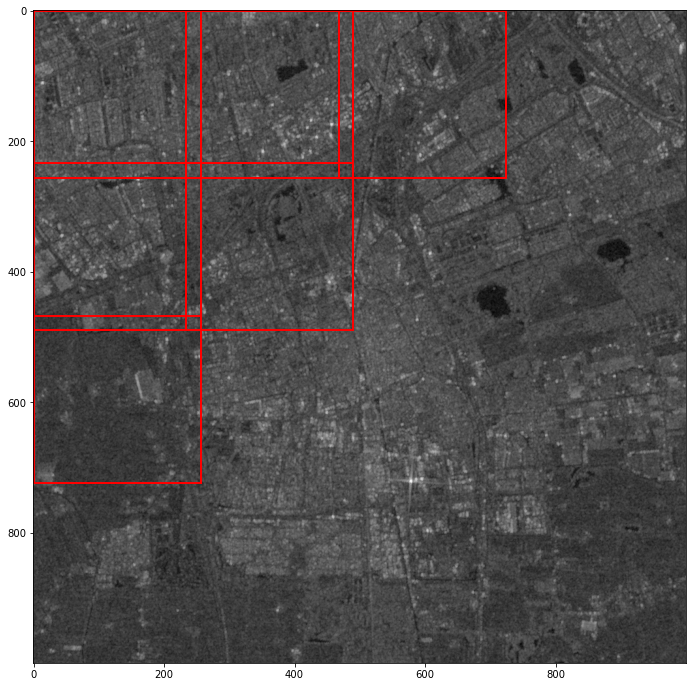

In [9]:
## Zoom into sample area
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(sampleImage[0:1000,0:1000], cmap='gray')
rect1 = patches.Rectangle((234*0, 234*0), 256, 256, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = patches.Rectangle((234*1, 234*0), 256, 256, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect2)
rect3 = patches.Rectangle((234*2, 234*0), 256, 256, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect3)
rect4 = patches.Rectangle((234*0, 234*1), 256, 256, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect4)
rect4 = patches.Rectangle((234*1, 234*1), 256, 256, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect4)
rect5 = patches.Rectangle((234*0, 234*2), 256, 256, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect5)
plt.show()